# Snow entity learning with XGBoost

This is a remake of a previous example "Snow entity learning with Random Forest". The code is a revised version to improve readability and ease of use.

This example follow the standard three steps that is the hallmark of machine learning.

First, we create the learn and test sets. For doing, we utilize an original way of clustering the snow spectra from an images selection.

Second, the learning process follows. We take 25% of the snow spectra set for learning purpose. The accuracy is calculated on the remaining 75%. A feature importances graph is generated. It's one of the sweet spot of using Gradient Boosting, he has some explanatory capacity.

Finally, we exercise the model prediction on a selected images set, some with snow and others without. We add a difficulty level by using no-snow images that can be confusing for the learned model. And in some case it is, see the first note below. To have a better visual feedback we show the result of applying the model prediction on all the image including the spectra used to learn the model. It does not follow the standard way of doing, but it's easier to visually assess the results.


Notes:
* The images electromagnetic spectrum used here is in the visual range. This is not the best range to identify matter like snow. Near infrared is a better bet.
* A basic hyperparameters tuning was done before the learning. But not so much.
* Tree Gradient Boosting is efficient for hyperspectral image classification, see the paper: B. T. Abe, O. O. Olugbara and T. Marwala, Hyperspectral Image Classification using Random Forests and Neural Networks, Proceedings of the World Congress on Engineering and Computer Science, 2012 Vol1, San Francisco.

In [1]:
%matplotlib inline

from __future__ import print_function
import os
import os.path as osp
import numpy as np

import pysptools.ml as ml
import pysptools.skl as skl

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
    

def tune():
    return {'objective':"binary:logistic",'scale_pos_weight': 1.5, 'n_estimators': 823,
            'reg_alpha': 0.01, 'subsample': 0.6, 'reg_lambda': 1, 'min_child_weight': 1,
            'gamma': 0.3, 'max_depth': 26, 'learning_rate': 0.01, 'colsample_bytree': 0.6}


def fit_model(rpath, X_train, y_train, X_test, y_test, estimator, param, stat=False):
    model = estimator(**param)
    model.fit(X_train, y_train)
    if stat == True:
        accuracy(model, X_test, y_test)
    if rpath == None:
        model.display_feature_importances(height=0.6, sort=True, n_labels='all')
    else:
        model.plot_feature_importances(rpath, height=0.6, sort=True, n_labels='all')
    return model


def accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    ## evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    

home_path = os.environ['HOME']
source_path = osp.join(home_path, 'dev-data/CZ_hsdb')
result_path = None

/home/cri/anaconda3-440/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# First step: build snow spectra set

To extract the snow spectra we use a clustering method. The clusters are made with scikit-learn estimators. We use estimators as pattern-matcher and within a trail and error methodology. Note that for the cases presented, clustering is not fine tune. We can do a better clustering with patience.

The snow spectra set is build from height images.

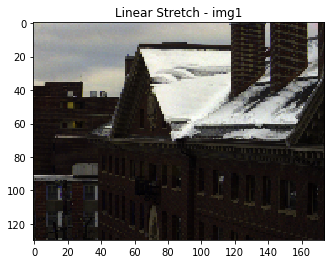

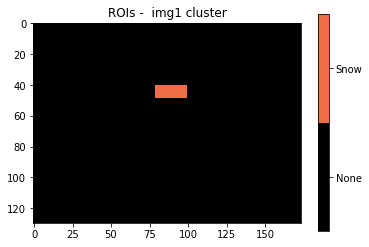

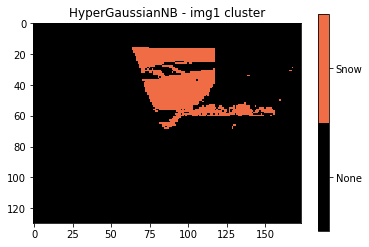

In [2]:
# img1

# get_scaled_img_and_class_map:
#    * load the image
#    * shrink it by 3
#    * scale
#    * class map = Cluster(estimator, estimator_param)
#    * return the scaled image and the class map

img1_scaled, img1_cmap = ml.get_scaled_img_and_class_map(source_path, result_path, 'img1', 
                          [['Snow',{'rec':(41,79,49,100)}]],
                          skl.HyperGaussianNB, None,
                          display=True)

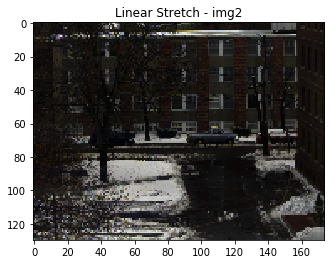

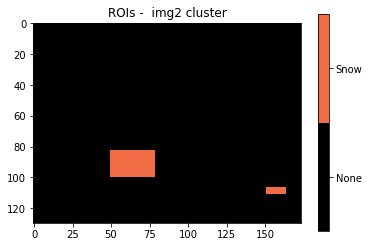

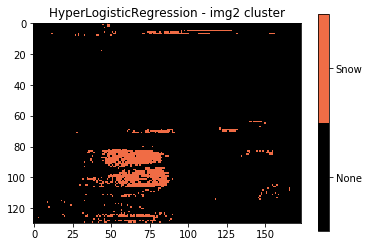

In [3]:
# img2
img2_scaled, img2_cmap = ml.get_scaled_img_and_class_map(source_path, result_path, 'img2', 
                          [['Snow',{'rec':(83,50,100,79)},{'rec':(107,151,111,164)}]],
                          skl.HyperLogisticRegression, {'class_weight':{0:1.0,1:5}},
                          display=True)

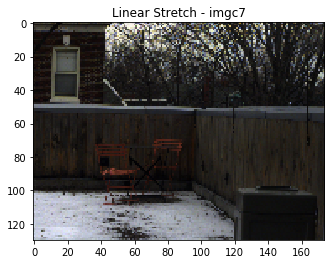

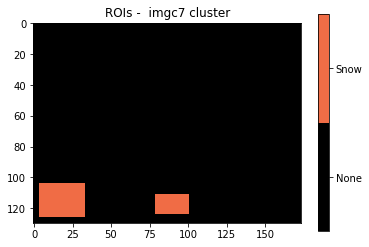

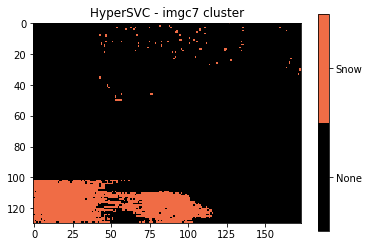

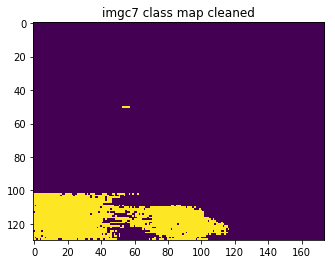

In [4]:
# imgc7
imgc7_scaled, imgc7_cmap = ml.get_scaled_img_and_class_map(source_path, result_path, 'imgc7', 
                          [['Snow',{'rec':(104,4,126,34)},{'rec':(111,79,124,101)}]],
                          skl.HyperSVC, {'class_weight':{0:1,1:10},'gamma':0.5},
                          display=True)
# Clean the top half:
imgc7_cmap[0:50,0:imgc7_cmap.shape[1]] = 0
ml.display_img(imgc7_cmap, 'imgc7 class map cleaned')

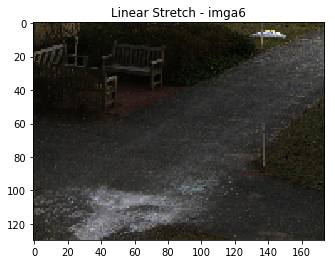

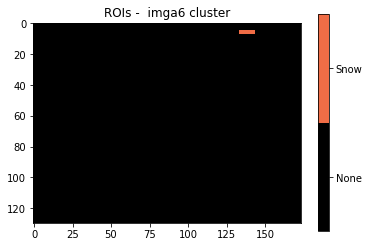

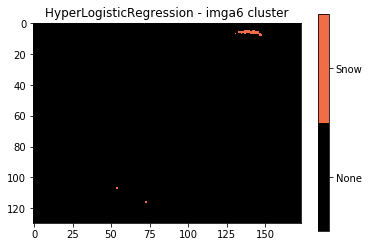

In [5]:
# imga6
imga6_scaled, imga6_cmap = ml.get_scaled_img_and_class_map(source_path, result_path, 'imga6', 
                          [['Snow',{'rec':(5,134,8,144)}]],
                          skl.HyperLogisticRegression, {'class_weight':{0:1.0,1:5}},
                          display=True)

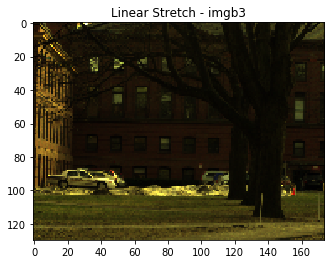

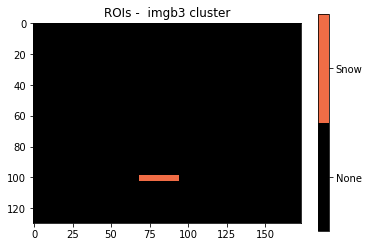

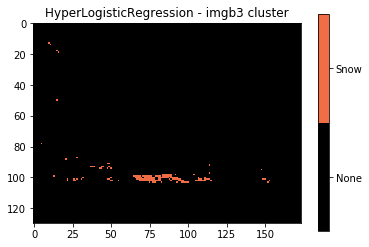

In [6]:
# imgb3
imgb3_scaled, imgb3_cmap = ml.get_scaled_img_and_class_map(source_path, result_path, 'imgb3', 
                          [['Snow',{'rec':(99,69,103,95)}]],
                          skl.HyperLogisticRegression, {'class_weight':{0:1.0,1:5}},
                          display=True)

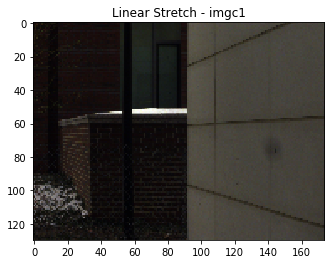

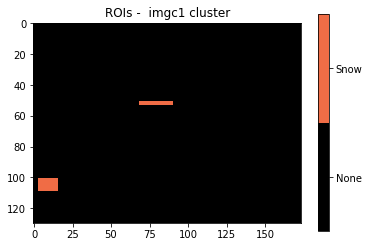

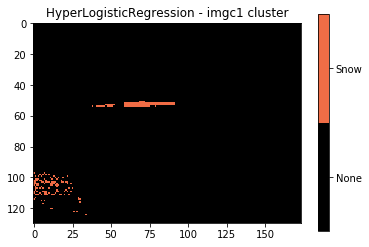

In [7]:
# imgc1
imgc1_scaled, imgc1_cmap = ml.get_scaled_img_and_class_map(source_path, result_path, 'imgc1', 
                          [['Snow',{'rec':(51,69,54,91)},{'rec':(101,3,109,16)}]],
                          skl.HyperLogisticRegression, {'class_weight':{0:1.0,1:5}},
                          display=True)

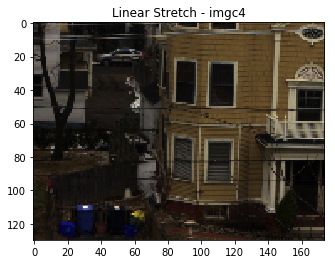

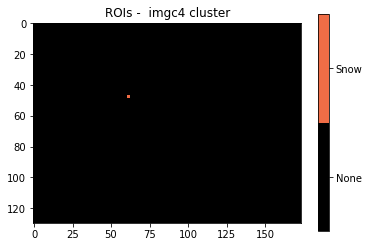

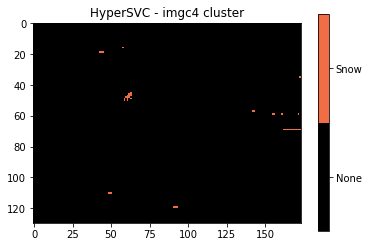

In [8]:
# imgc4
imgc4_scaled, imgc4_cmap = ml.get_scaled_img_and_class_map(source_path, result_path, 'imgc4', 
                          [['Snow',{'rec':(47,61,49,63)}]],
                          skl.HyperSVC, {'class_weight':{0:0.05,1:40}},
                          display=True)

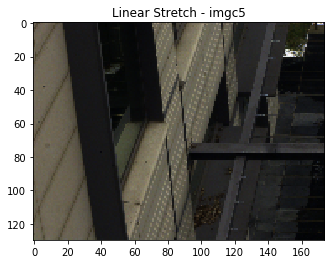

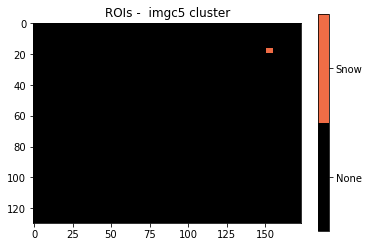

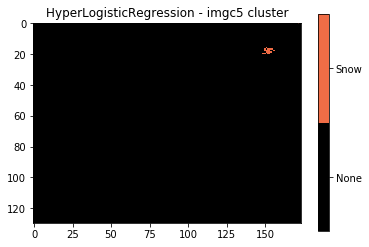

In [9]:
# imgc5
imgc5_scaled, imgc5_cmap = ml.get_scaled_img_and_class_map(source_path, result_path, 'imgc5', 
                          [['Snow',{'rec':(17,151,20,156)}]],
                          skl.HyperLogisticRegression, {'class_weight':{0:1.0,1:5}},
                          display=True)

# Second step: learn

Do a standard learning using XGBoost. It use the HyperXGBClassifier estimator. See the pysptools.ml module doc.

Accuracy: 99.19%


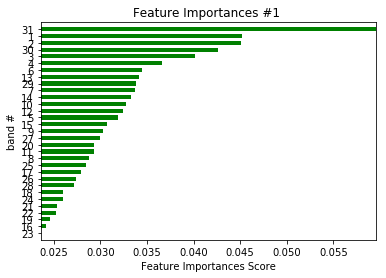

In [12]:
n_shrink = 3

snow_fname = ['img1','img2','imgc7','imga6','imgb3','imgc1','imgc4','imgc5']
nosnow_fname = ['imga1','imgb1','imgb6','imga7']

snow_img = [img1_scaled,img2_scaled,imgc7_scaled,imga6_scaled,
            imgb3_scaled,imgc1_scaled,imgc4_scaled,imgc5_scaled]

nosnow_img = ml.batch_load(source_path, nosnow_fname, n_shrink)

snow_cmap = [img1_cmap,img2_cmap,imgc7_cmap,imga6_cmap,
             imgb3_cmap,imgc1_cmap,imgc4_cmap,imgc5_cmap]

# create a background class map
# it's use for no-snow images
M = snow_img[0]
bkg_cmap = np.zeros((M.shape[0],M.shape[1]))
    
X,y = skl.shape_to_XY(snow_img + nosnow_img, 
                      snow_cmap + [bkg_cmap,bkg_cmap,bkg_cmap,bkg_cmap])

seed = 5
train_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,
                                                    random_state=seed)
best_param = tune()

model = fit_model(result_path, X_train, y_train, X_test, y_test, 
                  ml.HyperXGBClassifier, best_param, stat=True)

# The model can be save to a file with this method call:
# model.save(osp.join(result_path, 'xgb_model'), X_train.shape[1], 2)
# the signature of the call is: save(self, fname, n_features, n_classes)
#
# and load from a file with a function call:
# model = ml.load_xgb_model(osp.join(result_path, 'xgb_model'))

# Third step: verification

The model is applied to a set of images to verify its accuracy. It's a visual validation.

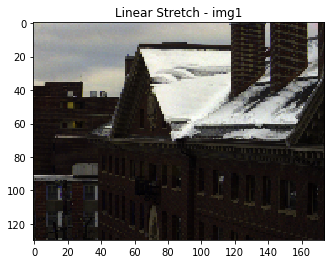

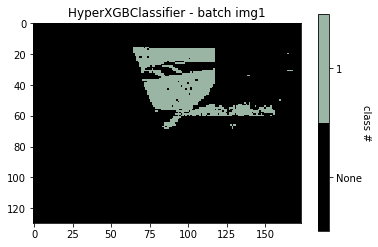

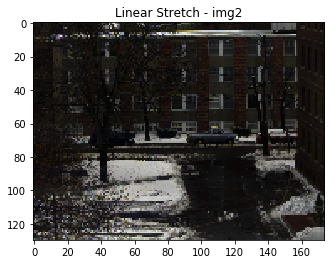

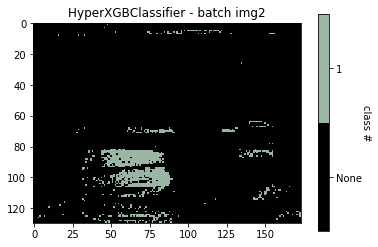

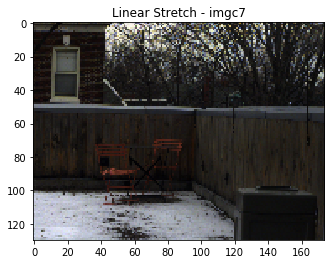

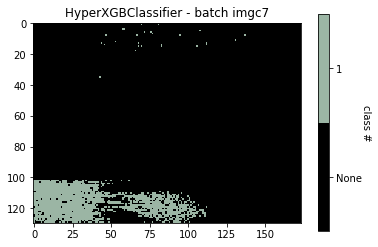

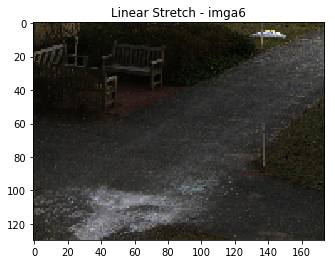

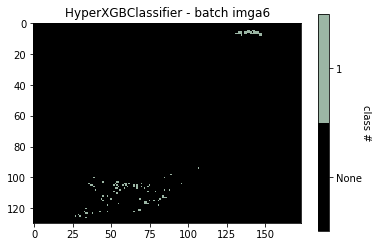

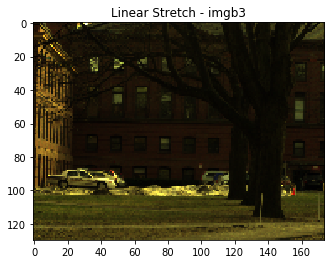

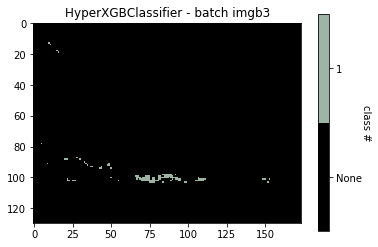

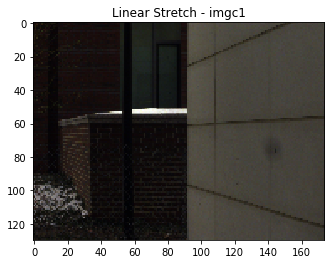

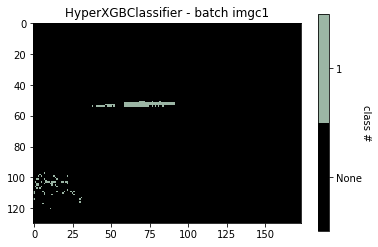

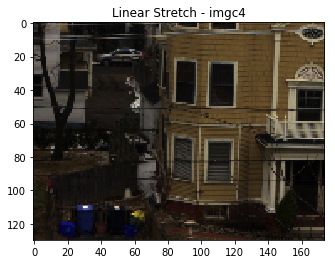

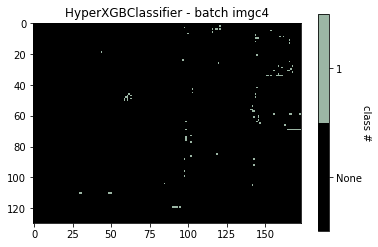

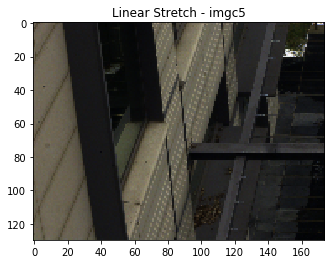

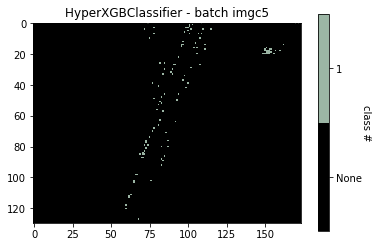

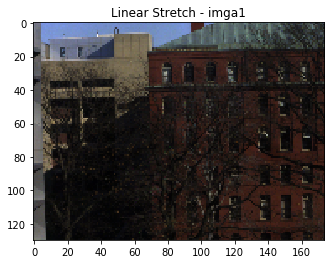

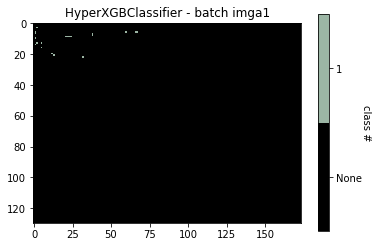

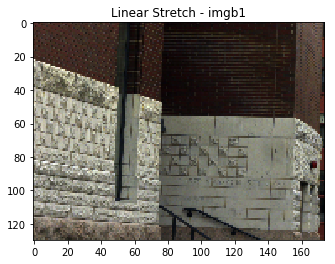

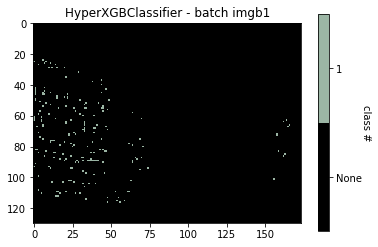

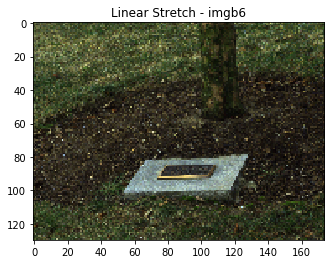

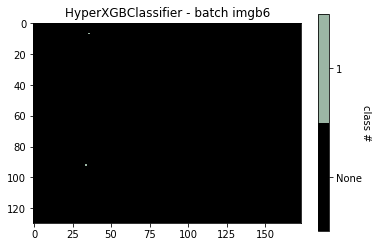

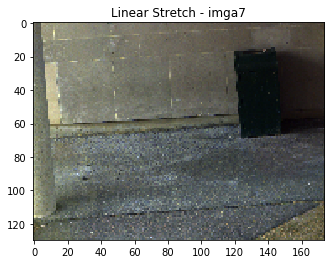

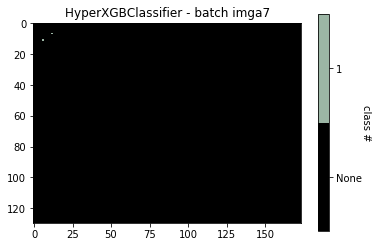

In [13]:
ml.batch_classify(source_path, result_path, model, snow_fname + nosnow_fname, n_shrink)